**Sprint - 2 Model Building**

**Team ID - PNT2022TMID43750**

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

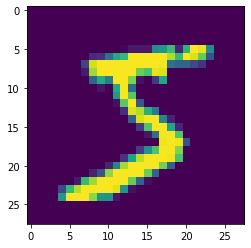

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [14]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.1287 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.1280 - val_accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.1567 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.1550 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.1533 - val_accuracy: 0.9800


In [15]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1533023715019226, 0.9800000190734863]


In [16]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[1.57013953e-22 1.05237719e-31 1.44152021e-18 2.48789874e-14
  5.22477029e-32 1.62051050e-32 2.35209763e-32 1.00000000e+00
  8.88774670e-22 3.91308977e-21]
 [1.38324316e-18 1.13659164e-20 1.00000000e+00 9.82951370e-29
  2.84247018e-31 3.27208065e-35 2.97511792e-20 4.10484220e-36
  9.56239922e-31 6.17407171e-37]
 [2.43811615e-19 1.00000000e+00 4.88021760e-15 1.58687401e-21
  2.12824203e-12 5.83108526e-14 3.45494522e-16 5.42880198e-16
  4.07244710e-10 1.04549374e-18]
 [1.00000000e+00 5.83063489e-31 3.33694162e-16 7.93621533e-25
  1.54172835e-21 7.02358794e-26 8.05105602e-24 2.34972875e-18
  1.98525729e-16 7.00040925e-15]]


In [17]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
